# Cyber Project Machine Learninbg Techniques 

<h2 style="width: 100%;
    margin: 0;
    padding: 0;
    text-align: center;">---- Table of contents ----</h2>

1. [Importing Libraries](#1)
2. [Load Dataset](#2)
3. [Meta information of Dataframe](#3)
4. [Checking for NaN values](#4)
5. [Feature Extraction](#5)
6. [Train & Test Split](#6)
7. [Training models](#7)
  <ul>
      <li>✔️ Decision Tree Classifier</li>
      <li>✔️ Random Forest Classifier</li>
      <li>✔️ AdaBoost Classifier</li>
      <li>✔️ Gaussian NB</li>
      <li>✔️ Extra Trees Classifier</li>
      <li>✔️ KNeighbors Classifier</li>
      <li>✔️ Voting Classifier for 4 Top Models</li>
     <li>✔️Multi-Layer Perceptron Neural Network(MLP)</li>
  </ul>
8. [The Chaimpion Model](#8)

In [3]:
# extract the domain name from a URL (Extract the top level domain (TLD) from the URL given).
!pip install tld
!pip install colorama

     |████████████████████████████████| 412 kB 913 kB/s eta 0:00:01


<a id="1"></a> <br>
# 📥 Importing Libraries

In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from colorama import Fore  
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld
from sklearn.exceptions import FitFailedWarning
import warnings
#warnings.filterwarnings(action='ignore')
warnings.simplefilter('always', FitFailedWarning)

<a id="2"></a> <br>
# 🗃️ Load Dataset

In [5]:
data = pd.read_csv('../input/malicious-urls-dataset/malicious_phish.csv')
data.head(20)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


Website **defacements** are the unauthorized modification of web pages, including the addition, removal, or alteration of existing content. These attacks are commonly carried out by hacktivists, who compromise a website or web server and replace or alter the hosted website information with their own messages.

**Phishing** is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message

**Malware** (short for “malicious software”) is a file or code, typically delivered over a network, that infects, explores, steals or conducts virtually any behavior an attacker wants. And because malware comes in so many variants, there are numerous methods to infect computer systems.

<a id="3"></a> <br>
# 📝 Meta information of Dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


<a id="4"></a>
# 🔎 Checking for NaN values

In [7]:
data.isnull().sum()

url     0
type    0
dtype: int64

#### there is not any nan value

In [8]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [9]:
x=count.index
x

Index(['benign', 'defacement', 'phishing', 'malware'], dtype='object')

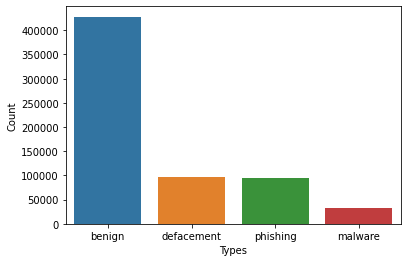

In [10]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

<h4>first have to omit the (www.) from the URL which is in fact a sub domain in itself.</h4>

![Whats a Subdom.jpeg](attachment:c0f7c696-0c69-4337-bf3f-979320f433c2.jpeg)

In [11]:
data['url'] = data['url'].replace('www.', '', regex=True)
data


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [12]:
data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [13]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)
data.head(20)

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://pashminaonline.com/pure-pashminas,defacement,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


<a id="5"></a> <br>
# 🦾 Feature Extraction

In [14]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [15]:
data.head()

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


In [16]:
def process_tld(url):
    try:
#         Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain



# netloc : Contains the network location - which includes the domain itself (and subdomain if present), 
# the port number, along with an optional credentials in form of username:password . Together it may take
# form of username:password@domain.com:80

In [17]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [18]:
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net


In [19]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [20]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [21]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    
    

    

# urlparse():This function parses a URL into six components, returning a 6-tuple. 
# This corresponds to the general structure of a URL. Each tuple item is a string. 
# The components are not broken up in smaller parts 
#(for example, the network location is a single string), and % escapes are not expanded.

In [22]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

In [23]:
data.head(10)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,0,1,1
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,0,1,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0,0


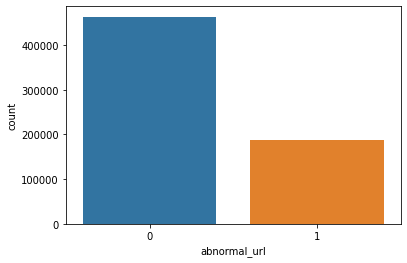

In [24]:
sns.countplot(x='abnormal_url', data=data);

In [25]:
def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl , 
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [26]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

In [27]:
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,0,1,1,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0


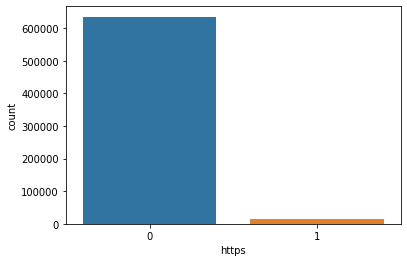

In [28]:
sns.countplot(x='https', data=data);

<h4>Counts the number of digit characters in a URL</h4>

In [29]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [30]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

<h4>Counts the number of letter characters in a URL</h4>

In [31]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,%,+,$,!,*,",",//,abnormal_url,https,digits
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,0,1,1,0,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,0,1,1,0,22


In [32]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

# The isalpha() method returns True if all the characters are alphabet letters (a-z). 
# Example of characters that are not alphabet letters: (space)!

In [33]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [34]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,1,1,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,1,1,0,22,199


<h4>Checks to see whether URL contains a shortening service</h4>

In [35]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    

# A URL shortening service is a third-party website that converts that long URL to a short, 
# case-sensitive alphanumeric code. Simply put, this means that a URL shortening service takes 
# ridiculously long URLs (web addresses) and makes them short.

In [36]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

In [37]:
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,...,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,1,1,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,1,1,0,22,199,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,...,0,0,0,0,1,1,0,1,93,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,...,0,0,0,0,0,0,0,4,31,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,...,0,0,0,0,0,0,0,0,40,1
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,...,0,0,0,0,1,1,0,0,34,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,...,0,0,0,0,0,0,0,5,33,0


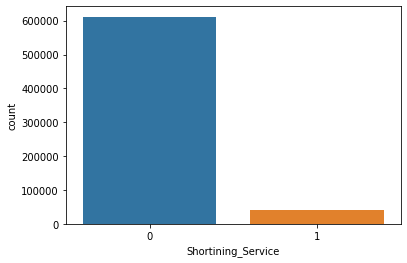

In [38]:
sns.countplot(x='Shortining_Service', data=data);

In [39]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [40]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [41]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,22,199,0,0


In [42]:
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

<AxesSubplot:>

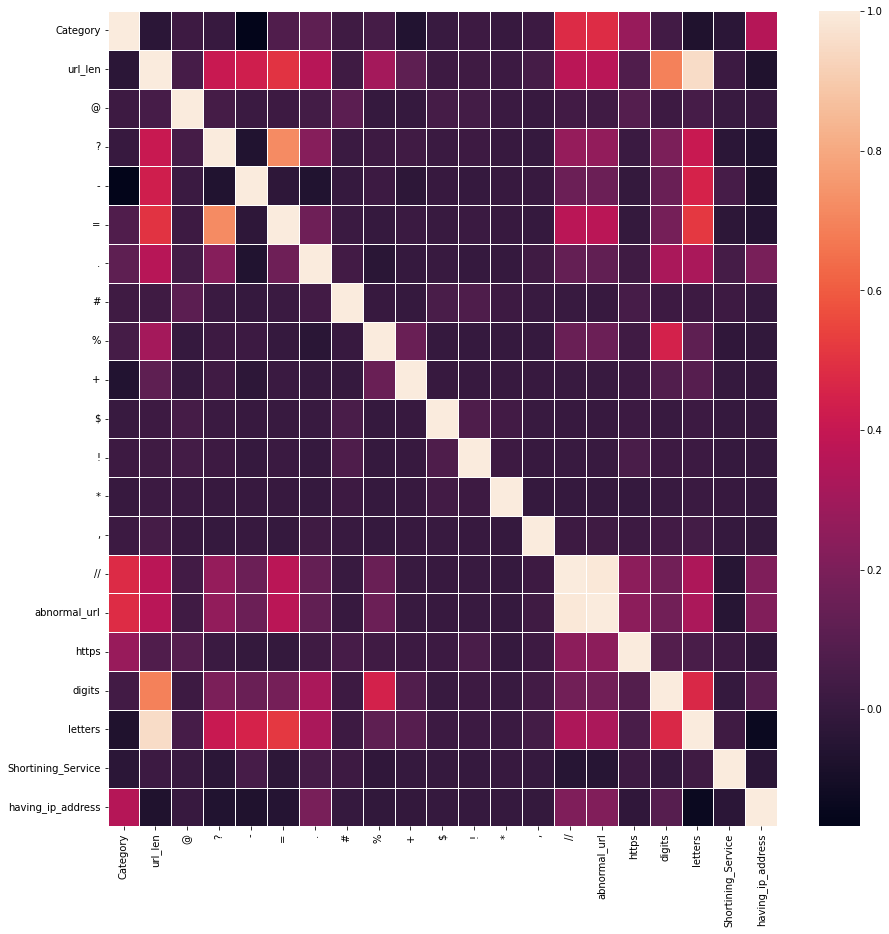

In [43]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

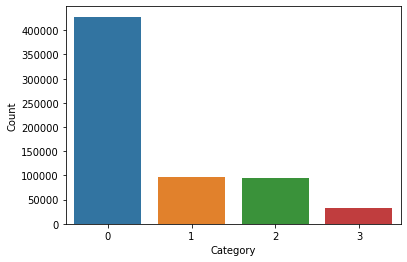

In [44]:
count = data.Category.value_counts()
count
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count');

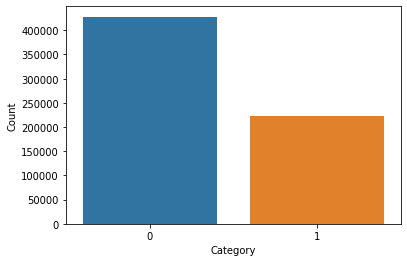

In [45]:
data['Category'] = data.Category.replace(2,1)
data['Category'] = data.Category.replace(3,1)
count = data.Category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count');

<a id="6"></a> <br>
# ✂️ Train & Test Split

In [46]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [48]:
X_train

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
510482,31,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,26,0,0
194358,86,0,0,7,0,1,0,0,0,0,0,0,0,1,1,0,6,65,0,0
611258,90,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,6,73,0,0
417382,39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34,0,0
225565,80,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,69,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84434,41,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,9,29,0,0
437782,21,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,18,0,0
620104,44,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,8,27,0,0
203245,56,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,48,0,0


In [49]:
X_test

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
238731,96,0,1,1,5,2,0,0,0,0,0,0,0,1,1,0,2,76,0,0
309364,84,0,1,1,3,2,0,0,0,0,0,0,0,0,0,0,13,59,0,0
170638,83,0,0,13,0,2,0,0,0,0,0,0,0,1,1,0,31,30,0,0
246063,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,0,0
466287,39,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,5,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348509,78,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,4,58,0,0
500295,28,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,25,0,0
53597,82,0,1,0,4,2,0,0,0,0,0,0,0,1,1,0,4,63,0,0
26012,26,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,22,0,0


In [50]:
y_train

510482    0
194358    0
611258    1
417382    0
225565    0
         ..
84434     0
437782    0
620104    1
203245    0
100879    1
Name: Category, Length: 520952, dtype: int64

In [51]:
y_test

238731    1
309364    0
170638    1
246063    0
466287    0
         ..
348509    1
500295    0
53597     1
26012     0
212458    0
Name: Category, Length: 130239, dtype: int64

### Upsampling milicious url

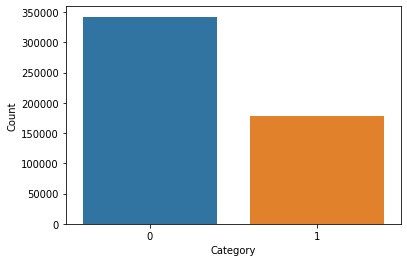

In [52]:
train_count = y_train.value_counts()
sns.barplot(x=train_count.index, y=train_count)
plt.xlabel('Category')
plt.ylabel('Count');

In [53]:
y_train.shape

(520952,)

In [54]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 178414
Before OverSampling, counts of label '0': 342538 



In [55]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 178414
Before OverSampling, counts of label '0': 342538 

Before OverSampling, the shape of train_X: (520952, 20)
Before OverSampling, the shape of train_y: (520952,) 

After OverSampling, the shape of train_X: (685076, 20)
After OverSampling, the shape of train_y: (685076,) 

After OverSampling, counts of label '1': 342538
After OverSampling, counts of label '0': 342538


In [56]:
y_train_res_=  pd.Series(y_train_res) 

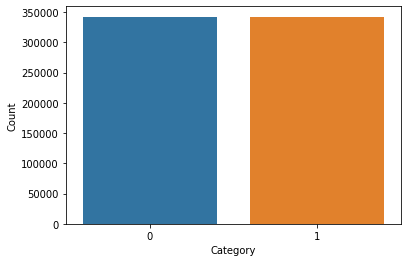

In [57]:
train_res_count = y_train_res_.value_counts()
sns.barplot(x=train_res_count.index, y=train_res_count)
plt.xlabel('Category')
plt.ylabel('Count');

In [58]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 24.8 MB 915 kB/s eta 0:00:01    |▏                               | 133 kB 915 kB/s eta 0:00:27
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0.2 which is incompatible.


<a id="7"></a> <br>
# <img src="https://cdn-icons-png.flaticon.com/32/4149/4149680.png"/> Training models

In [59]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import tensorflow as tfa
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

2022-12-19 21:35:31.704579: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


### Parameters distributions of models

In [60]:
# DecisionTreeClassifier
params_DT = {
    'max_depth': [2, 10, 20],
    'min_samples_leaf': [5, 10, 100],
    'criterion': ["gini", "entropy"]}
###################################################################
# RandomForestClassifier
params_RF = {'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [500, 1000]}
###################################################################
# AdaBoostClassifier
params_Adb = {
    'n_estimators': [2, 3, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 3)],
    'algorithm': ['SAMME', 'SAMME.R']}
###################################################################
# GaussianNB
params_NB = {'var_smoothing': np.logspace(0,-9, num=30)}
###################################################################
# ExtraTreesClassifier
params_EXTC = {
    'max_depth': [2, 20,50],
    'min_samples_leaf': [15, 55, 100],
    'criterion': ["gini", "entropy","log_loss"]}
##################################################################
# KNeighborsClassifier
params_KNN = { 'n_neighbors' : [5,7,15],
               'weights' : ['uniform','distance'],
               'metric' : ['euclidean','manhattan']}

In [61]:
def getScores(estimator, x, y):
    y_pred = estimator.predict(x)
    Recall =  recall_score(y, y_pred, pos_label=1)
    return Recall

def my_scorer(estimator, x, y):
    r = getScores(estimator, x, y)
    print(f'the Recall (calss 1) : {r}')
    return r

In [62]:
def getBestParamsModel(Model, grid_params, X, y, title):
    print(f"Getting the best parameters of {title}")
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    grid_search = GridSearchCV(estimator=Model, param_grid=grid_params, n_jobs=1, cv=cv, scoring= getScores, error_score=0)
    grid_result = grid_search.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_result.best_score_, stds, grid_result.best_params_

In [236]:
means_DT, stds_DT, params_DT = getBestParamsModel(DecisionTreeClassifier(random_state=42), params_DT, X_train_res, y_train_res, DecisionTreeClassifier())

Getting the best parameters of DecisionTreeClassifier()
Best: 0.856366 using {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
0.653066 (0.002604) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.653066 (0.002604) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.653066 (0.002604) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.790276 (0.006030) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
0.790113 (0.006027) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
0.786379 (0.005555) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100}
0.856366 (0.003906) with: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
0.852978 (0.003743) with: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}
0.828392 (0.004197) with: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 100}
0.682824 (0.002621) with: {'criterion': 'entropy', 'max_depth':

In [87]:
means_RF, stds_RF, params_RF = getBestParamsModel(RandomForestClassifier(random_state=42), params_RF, X_train_res, y_train_res, RandomForestClassifier())

Getting the best parameters of RandomForestClassifier()
Best: 0.783629 using {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 500}
0.779736 (0.032291) with: {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 500}
0.779155 (0.032593) with: {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 1000}
0.779736 (0.032291) with: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 500}
0.779155 (0.032593) with: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 1000}
0.783629 (0.033302) with: {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 500}
0.783628 (0.033104) with: {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 1000}
0.783629 (0.033302) with: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 500}
0.783628 (0.033104) with: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 1000}


In [217]:
means_Adb, stds_Adb, params_Adb = getBe685076stParamsModel(AdaBoostClassifier(random_state=42), params_Adb, X_train_res, y_train_res, AdaBoostClassifier())

Getting the best parameters of AdaBoostClassifier()
Best: 0.757063 using {'algorithm': 'SAMME', 'learning_rate': 0.98, 'n_estimators': 20}
0.682824 (0.002621) with: {'algorithm': 'SAMME', 'learning_rate': 0.98, 'n_estimators': 2}
0.682824 (0.002621) with: {'algorithm': 'SAMME', 'learning_rate': 0.98, 'n_estimators': 3}
0.757063 (0.005058) with: {'algorithm': 'SAMME', 'learning_rate': 0.98, 'n_estimators': 20}
0.682824 (0.002621) with: {'algorithm': 'SAMME', 'learning_rate': 0.99, 'n_estimators': 2}
0.682824 (0.002621) with: {'algorithm': 'SAMME', 'learning_rate': 0.99, 'n_estimators': 3}
0.753644 (0.005309) with: {'algorithm': 'SAMME', 'learning_rate': 0.99, 'n_estimators': 20}
0.682824 (0.002621) with: {'algorithm': 'SAMME.R', 'learning_rate': 0.98, 'n_estimators': 2}
0.635089 (0.003236) with: {'algorithm': 'SAMME.R', 'learning_rate': 0.98, 'n_estimators': 3}
0.745415 (0.002312) with: {'algorithm': 'SAMME.R', 'learning_rate': 0.98, 'n_estimators': 20}
0.682824 (0.002621) with: {'algor

In [218]:
means_NB, stds_NB, params_NB = getBestParamsModel(GaussianNB(), params_NB, X_train_res, y_train_res, GaussianNB())

Getting the best parameters of GaussianNB()
Best: 0.954743 using {'var_smoothing': 0.013738237958832623}
0.306894 (0.009085) with: {'var_smoothing': 1.0}
0.316760 (0.007611) with: {'var_smoothing': 0.48939009184774934}
0.335788 (0.007360) with: {'var_smoothing': 0.23950266199874853}
0.374978 (0.010105) with: {'var_smoothing': 0.117210229753348}
0.475230 (0.024384) with: {'var_smoothing': 0.057361525104486784}
0.944503 (0.009221) with: {'var_smoothing': 0.02807216203941177}
0.954743 (0.000933) with: {'var_smoothing': 0.013738237958832623}
0.948013 (0.001486) with: {'var_smoothing': 0.006723357536499335}
0.938956 (0.000839) with: {'var_smoothing': 0.0032903445623126675}
0.928844 (0.000901) with: {'var_smoothing': 0.0016102620275609393}
0.841284 (0.021505) with: {'var_smoothing': 0.0007880462815669912}
0.632666 (0.002818) with: {'var_smoothing': 0.00038566204211634724}
0.635162 (0.002635) with: {'var_smoothing': 0.00018873918221350958}
0.640488 (0.002660) with: {'var_smoothing': 9.2367085

In [219]:
means_EXTC, stds_EXTC, params_EXTC = getBestParamsModel(ExtraTreesClassifier(random_state=42), params_EXTC, X_train_res, y_train_res, ExtraTreesClassifier())

Getting the best parameters of ExtraTreesClassifier()


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    test,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 208, in

Best: 0.683098 using {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 15}
0.683098 (0.002611) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 15}
0.683098 (0.002611) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 55}
0.683098 (0.002611) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.683043 (0.002637) with: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 15}
0.683075 (0.002610) with: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 55}
0.683077 (0.002632) with: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 100}
0.683048 (0.002651) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 15}
0.683065 (0.002620) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 55}
0.683070 (0.002633) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 100}
0.683098 (0.002611) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 15}
0.683098 (0.002611) with:

In [220]:
means_KNN, stds_KNN, params_KNN = getBestParamsModel(KNeighborsClassifier(), params_KNN, X_train_res, y_train_res, KNeighborsClassifier())

Getting the best parameters of KNeighborsClassifier()
Best: 0.882192 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.876244 (0.004242) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.880642 (0.004245) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.872982 (0.003823) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.879596 (0.003721) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.860647 (0.003447) with: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
0.874683 (0.003384) with: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
0.877756 (0.004189) with: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
0.882192 (0.004265) with: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.874893 (0.003690) with: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
0.881516 (0.003664) with: {'metric': 'manhat

In [69]:
lstparams = [params_DT, params_RF, params_Adb, params_NB, params_EXTC, params_KNN]
lstModels = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GaussianNB, ExtraTreesClassifier, KNeighborsClassifier]
lstmodelnmae = ['Decision Tree Classifier','Random Forest Classifier',
                                'AdaBoost Classifier','Gaussian NB', 'Extra Trees Classifier', 'KNeighbors Classifier']
Df_bestParametersModels = pd.DataFrame(index = [lstmodelnmae])
Df_bestParametersModels["The best parameters"] = lstparams
Df_bestParametersModels["The Recall Score of class attack"] = [means_DT, means_RF, means_Adb, means_NB, means_EXTC, means_KNN]
display(Df_bestParametersModels)

,The best parameters,The Recall Score of class attack
Decision Tree Classifier,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.856366
Random Forest Classifier,"{'bootstrap': False, 'max_features': 'auto', '...",0.783629
AdaBoost Classifier,"{'algorithm': 'SAMME', 'learning_rate': 0.98, ...",0.757063
Gaussian NB,{'var_smoothing': 0.013738237958832623},0.954743
Extra Trees Classifier,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.683098
KNeighbors Classifier,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.882192


Model =>>>> Decision Tree Classifier has already been fitted. 
---------------------------------------------------------------
The Recall score (Class 1) of Decision Tree Classifier: 85.05618480547969
---------------------------------------------------------------
The F_score score (Class 1) of Decision Tree Classifier: 86.21605064325098
---------------------------------------------------------------
Classification_report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     85565
           1       0.87      0.85      0.86     44674

    accuracy                           0.91    130239
   macro avg       0.90      0.89      0.90    130239
weighted avg       0.91      0.91      0.91    130239



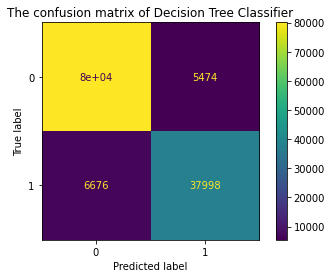

Decision Tree Classifier saved! Done!
###################- End -###################
Model =>>>> Random Forest Classifier has already been fitted. 
---------------------------------------------------------------
The Recall score (Class 1) of Random Forest Classifier: 86.85365089313694
---------------------------------------------------------------
The F_score score (Class 1) of Random Forest Classifier: 88.42726589028919
---------------------------------------------------------------
Classification_report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     85565
           1       0.90      0.87      0.88     44674

    accuracy                           0.92    130239
   macro avg       0.92      0.91      0.91    130239
weighted avg       0.92      0.92      0.92    130239



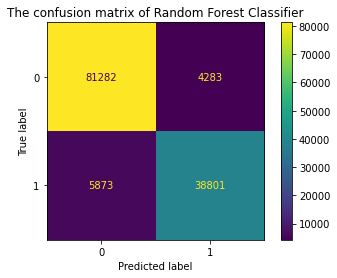

Random Forest Classifier saved! Done!
###################- End -###################
Model =>>>> AdaBoost Classifier has already been fitted. 
---------------------------------------------------------------
The Recall score (Class 1) of AdaBoost Classifier: 76.13376908268792
---------------------------------------------------------------
The F_score score (Class 1) of AdaBoost Classifier: 77.17984501401227
---------------------------------------------------------------
Classification_report of AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     85565
           1       0.78      0.76      0.77     44674

    accuracy                           0.85    130239
   macro avg       0.83      0.83      0.83    130239
weighted avg       0.84      0.85      0.85    130239



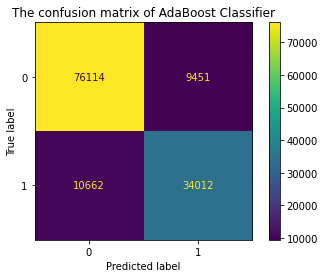

AdaBoost Classifier saved! Done!
###################- End -###################
Model =>>>> Gaussian NB has already been fitted. 
---------------------------------------------------------------
The Recall score (Class 1) of Gaussian NB: 95.55669964632672
---------------------------------------------------------------
The F_score score (Class 1) of Gaussian NB: 51.3230821020234
---------------------------------------------------------------
Classification_report of Gaussian NB
              precision    recall  f1-score   support

           0       0.77      0.08      0.14     85565
           1       0.35      0.96      0.51     44674

    accuracy                           0.38    130239
   macro avg       0.56      0.52      0.33    130239
weighted avg       0.62      0.38      0.27    130239



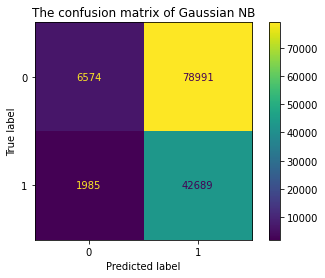

Gaussian NB saved! Done!
###################- End -###################
Model =>>>> Extra Trees Classifier has already been fitted. 
---------------------------------------------------------------
The Recall score (Class 1) of Extra Trees Classifier: 68.5902314545373
---------------------------------------------------------------
The F_score score (Class 1) of Extra Trees Classifier: 74.34762037632385
---------------------------------------------------------------
Classification_report of Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     85565
           1       0.81      0.69      0.74     44674

    accuracy                           0.84    130239
   macro avg       0.83      0.80      0.81    130239
weighted avg       0.84      0.84      0.83    130239



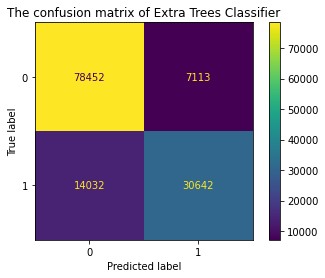

Extra Trees Classifier saved! Done!
###################- End -###################
Model =>>>> KNeighbors Classifier has already been fitted. 
---------------------------------------------------------------
The Recall score (Class 1) of KNeighbors Classifier: 86.42387070779425
---------------------------------------------------------------
The F_score score (Class 1) of KNeighbors Classifier: 85.67402640630202
---------------------------------------------------------------
Classification_report of KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     85565
           1       0.85      0.86      0.86     44674

    accuracy                           0.90    130239
   macro avg       0.89      0.89      0.89    130239
weighted avg       0.90      0.90      0.90    130239



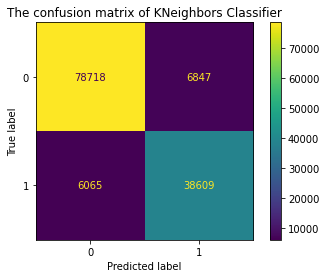

KNeighbors Classifier saved! Done!
###################- End -###################


In [104]:
RecallScoreLst = []
f1scoreLst = []
for i in range(len(lstModels)):
    print(f'Model =>>>> {lstmodelnmae[i]} has already been fitted. ')
    readyModel = lstModels[i](**lstparams[i])
    readyModel.fit(X_train_res, y_train_res)
    pred = readyModel.predict(X_test)
    Recall = recall_score(y_test, pred, pos_label=1)
    f_score = f1_score(y_test, pred)
    RecallScoreLst.append(Recall)
    f1scoreLst.append(f_score)
    print('---------------------------------------------------------------')
    print(f'The Recall score (Class 1) of {lstmodelnmae[i]}: {Recall*100}')
    print('---------------------------------------------------------------')
    print(f'The F_score score (Class 1) of {lstmodelnmae[i]}: {f_score*100}')
    print('---------------------------------------------------------------')
    print(f'Classification_report of {lstmodelnmae[i]}')
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    plt.title(f"The confusion matrix of {lstmodelnmae[i]}")
    plt.show()
    # save model
    joblib.dump(readyModel, f'./{lstmodelnmae[i]}.pkl')
    print(f"{lstmodelnmae[i]} saved! Done!")
    print('\033[31m###################- End -###################\033[0m')

In [71]:
AccModelsRecall_1 = pd.DataFrame({'Models' : ['Decision Tree Classifier','Random Forest Classifier',
                                'AdaBoost Classifier','Gaussian NB', 'Extra Trees Classifier', 'KNeighbors Classifier']})
AccModelsRecall_1['The Recall score (Class 1)'] = RecallScoreLst
AccModelsRecall_1['The F_score score (Class 1)'] = f1scoreLst
AccModelsRecall_1["The best parameters"] = lstparams
AccModelsRecall_1

,Models,The Recall score (Class 1),The F_score score (Class 1),The best parameters
0,Decision Tree Classifier,0.850562,0.862161,"{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
1,Random Forest Classifier,0.868537,0.884273,"{'bootstrap': False, 'max_features': 'auto', '..."
2,AdaBoost Classifier,0.761338,0.771798,"{'algorithm': 'SAMME', 'learning_rate': 0.98, ..."
3,Gaussian NB,0.955567,0.513231,{'var_smoothing': 0.013738237958832623}
4,Extra Trees Classifier,0.685902,0.743476,"{'criterion': 'gini', 'max_depth': 2, 'min_sam..."
5,KNeighbors Classifier,0.864239,0.856740,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei..."


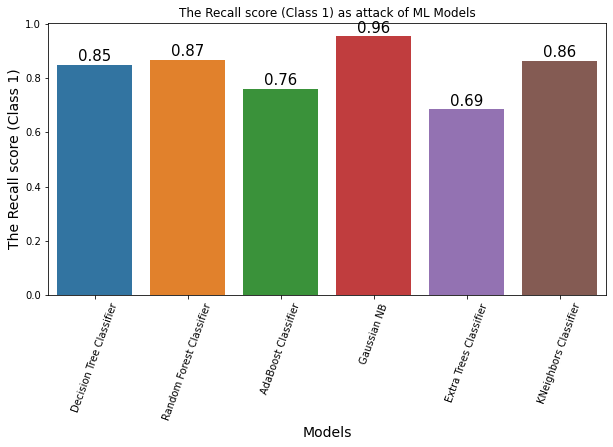

In [74]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x="Models", y='The Recall score (Class 1)', data=AccModelsRecall_1)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=70);
plt.ylabel("The Recall score (Class 1)", size=14)
plt.title("The Recall score (Class 1) as attack of ML Models")
plt.show()

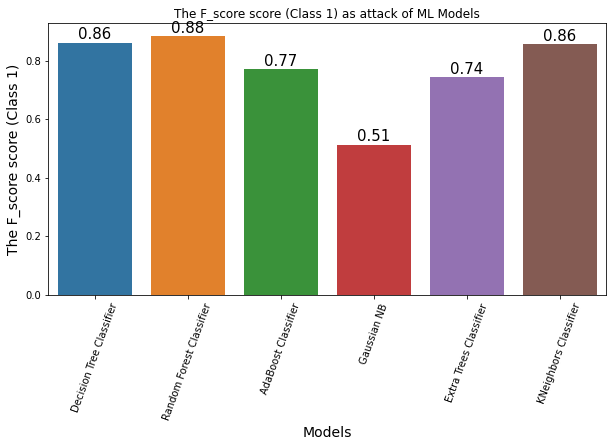

In [75]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x="Models", y='The F_score score (Class 1)', data=AccModelsRecall_1)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=70);
plt.ylabel("The F_score score (Class 1)", size=14)
plt.title("The F_score score (Class 1) as attack of ML Models")
plt.show()

In [141]:
Top4_Models= AccModelsRecall_1.nlargest(4,{'The Recall score (Class 1)', 'The F_score score (Class 1)'})
Top4_Models

,Models,The Recall score (Class 1),The F_score score (Class 1),The best parameters
1,Random Forest Classifier,0.868537,0.884273,"{'bootstrap': False, 'max_features': 'auto', '..."
0,Decision Tree Classifier,0.850562,0.862161,"{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
5,KNeighbors Classifier,0.864239,0.856740,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei..."
2,AdaBoost Classifier,0.761338,0.771798,"{'algorithm': 'SAMME', 'learning_rate': 0.98, ..."


In [89]:
RecallScoreLstTop = list(Top4_Models['The Recall score (Class 1)'])
RecallScoreLstTop

[0.868537, 0.850562, 0.864239, 0.761338]

In [90]:
FScoreLstTop = list(Top4_Models['The F_score score (Class 1)'])
FScoreLstTop

[0.884273, 0.862161, 0.85674, 0.771798]

### Using VotingClassifier for 4 top Models
https://github.com/HeshamAsem/Sklearn/blob/master/2.10_Ensemble_Classifier/2.10.3.4.py

In [80]:
from sklearn.ensemble import VotingClassifier
RFmodel = RandomForestClassifier(random_state=42, **params_RF)
KNNmodel = KNeighborsClassifier(**params_KNN)
DTmodel = DecisionTreeClassifier(random_state=42,**params_DT)
ADbosmodel = AdaBoostClassifier(random_state=42, **params_Adb)

Top4Modelclf = VotingClassifier(estimators=[('Random Forest Classifier', RFmodel),
                                            ('Decision Tree Classifier', DTmodel),
                                            ('KNeighbors Classifier', KNNmodel),
                                           ('AdaBoost Classifier', ADbosmodel)], voting='soft', weights=[4,2,3,1])
Top4Modelclf = Top4Modelclf.fit(X_train_res, y_train_res)

---------------------------------------------------------------
The Recall score (Class 1) of Top 4 models (VotingClassifier): 86.94094999328469
---------------------------------------------------------------
The f_score (Class 1) of Top 4 models (VotingClassifier): 88.22159884612327
---------------------------------------------------------------
Classification_report of  Top 4 models (VotingClassifier)
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     85565
           1       0.90      0.87      0.88     44674

    accuracy                           0.92    130239
   macro avg       0.91      0.91      0.91    130239
weighted avg       0.92      0.92      0.92    130239



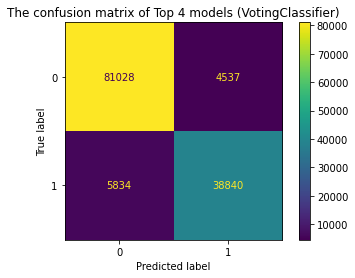

Top 4 models (VotingClassifier) saved! Done!


In [92]:
pred_voting = Top4Modelclf.predict(X_test)
Recall_voting = recall_score(y_test, pred_voting, pos_label=1)
RecallScoreLstTop.append(Recall_voting)
print('---------------------------------------------------------------')
print(f'The Recall score (Class 1) of Top 4 models (VotingClassifier): {Recall_voting*100}')
print('---------------------------------------------------------------')
f_score_voting = f1_score(y_test, pred_voting)
FScoreLstTop.append(f_score_voting)
print(f'The f_score (Class 1) of Top 4 models (VotingClassifier): {f_score_voting*100}')
print('---------------------------------------------------------------')
print(f'Classification_report of  Top 4 models (VotingClassifier)')
print(classification_report(y_test, pred_voting))
cm = confusion_matrix(y_test, pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title(f"The confusion matrix of Top 4 models (VotingClassifier)")
plt.show()
# save model
joblib.dump(Top4Modelclf, f'./Top4Modelclf.pkl')
print(f"Top 4 models (VotingClassifier) saved! Done!")

In [99]:
AccModelsRecall_all = pd.DataFrame({'Models' : ['Random Forest Classifier','Decision Tree Classifier', 'KNeighbors Classifier','AdaBoost Classifier', 
                                'Top 4 models (VotingClassifier)']})
AccModelsRecall_all['The Recall score (Class 1)'] = RecallScoreLstTop
AccModelsRecall_all['The F_score (Class 1)'] = FScoreLstTop
AccModelsRecall_all["The best parameters"] = [params_RF, params_DT, params_KNN, params_Adb, 'All Top']
AccModelsRecall_all

,Models,The Recall score (Class 1),The F_score (Class 1),The best parameters
0,Random Forest Classifier,0.868537,0.884273,"{'bootstrap': False, 'max_features': 'auto', '..."
1,Decision Tree Classifier,0.850562,0.862161,"{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
2,KNeighbors Classifier,0.864239,0.856740,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei..."
3,AdaBoost Classifier,0.761338,0.771798,"{'algorithm': 'SAMME', 'learning_rate': 0.98, ..."
4,Top 4 models (VotingClassifier),0.869409,0.882216,All Top


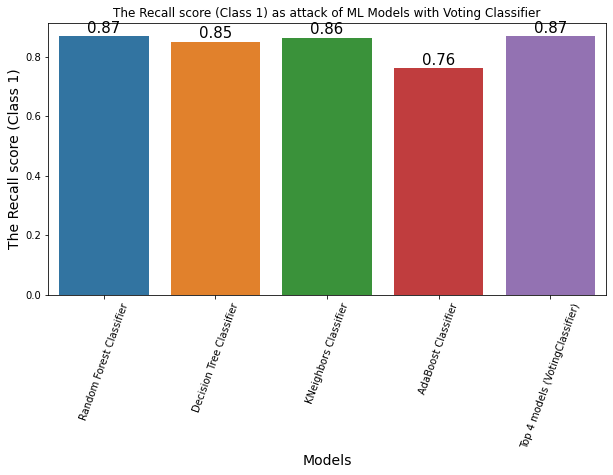

In [100]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x="Models", y='The Recall score (Class 1)', data=AccModelsRecall_all)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=70);
plt.title("The Recall score (Class 1) as attack of ML Models with Voting Classifier")
plt.ylabel("The Recall score (Class 1)", size=14)
plt.show()

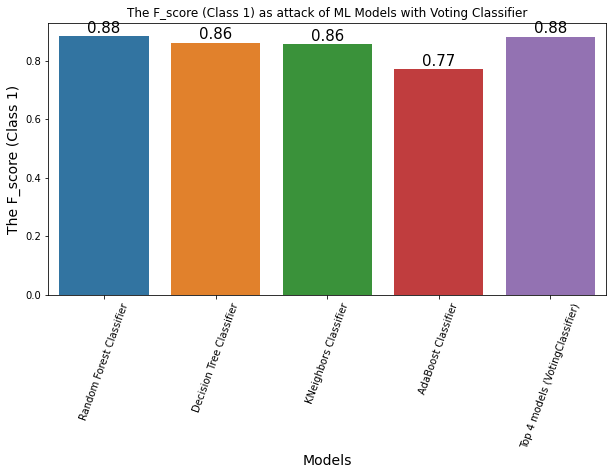

In [101]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x="Models", y='The F_score (Class 1)', data=AccModelsRecall_all)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=70);
plt.title("The F_score (Class 1) as attack of ML Models with Voting Classifier")
plt.ylabel("The F_score (Class 1)", size=14)
plt.show()

### Modeling : Multi-Layer Perceptron Neural Network(MLP)

#### **split training data(OverSampling) into training and validation data**

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.20, random_state=42,shuffle=True,stratify=y_train_res)

In [80]:
model = tfa.keras.Sequential()
# add the input layer
input =  tfa.keras.layers.Input(shape=( X_train.shape[1],))
model.add(input)
# add the hidden layers
model.add(tfa.keras.layers.Dense(512, activation='relu')) 
model.add(tfa.keras.layers.Dense(512, activation='relu')) 
model.add(tfa.keras.layers.Dense(128, activation='relu'))
model.add(tfa.keras.layers.Dense(128, activation='relu')) 
# add the output layer 
model.add(tfa.keras.layers.Dense(1, activation='sigmoid')) 
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               10752     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 355,713
Trainable params: 355,713
Non-trainable params: 0
_________________________________________________________________


In [83]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10, min_delta=0.0001)
history = model.fit(x= X_train,y = y_train,validation_data=(X_val, y_val),epochs=100, batch_size=128, callbacks=[es],verbose=2)

Epoch 1/100
4282/4282 - 8s - loss: 0.2748 - accuracy: 0.8791 - val_loss: 0.2496 - val_accuracy: 0.8937
Epoch 2/100
4282/4282 - 8s - loss: 0.2458 - accuracy: 0.8934 - val_loss: 0.2374 - val_accuracy: 0.8959
Epoch 3/100
4282/4282 - 9s - loss: 0.2363 - accuracy: 0.8971 - val_loss: 0.2326 - val_accuracy: 0.8974
Epoch 4/100
4282/4282 - 8s - loss: 0.2311 - accuracy: 0.8990 - val_loss: 0.2265 - val_accuracy: 0.9019
Epoch 5/100
4282/4282 - 8s - loss: 0.2310 - accuracy: 0.8987 - val_loss: 0.2239 - val_accuracy: 0.9016
Epoch 6/100
4282/4282 - 8s - loss: 0.2252 - accuracy: 0.9016 - val_loss: 0.2229 - val_accuracy: 0.9021
Epoch 7/100
4282/4282 - 9s - loss: 0.2224 - accuracy: 0.9027 - val_loss: 0.2253 - val_accuracy: 0.9004
Epoch 8/100
4282/4282 - 8s - loss: 0.2207 - accuracy: 0.9033 - val_loss: 0.2193 - val_accuracy: 0.9039
Epoch 9/100
4282/4282 - 8s - loss: 0.2186 - accuracy: 0.9040 - val_loss: 0.2220 - val_accuracy: 0.9027
Epoch 10/100
4282/4282 - 9s - loss: 0.2178 - accuracy: 0.9046 - val_loss:

#### Model evaluation

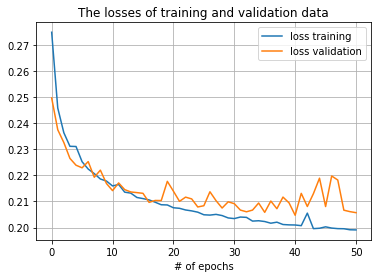

In [84]:
plt.title("The losses of training and validation data")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss training', 'loss validation'])
plt.xlabel("# of epochs")
plt.grid()

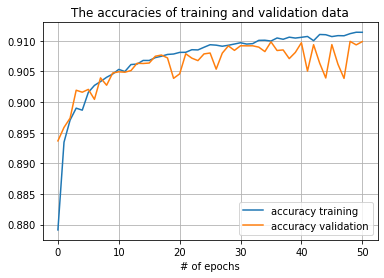

In [85]:
plt.title("The accuracies of training and validation data")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy training', 'accuracy validation'])
plt.xlabel("# of epochs")
plt.grid()

---------------------------------------------------------------
The Recall score (Class 1) of  Multi-Layer Perceptron Neural Network(MLP): 86.20450373819224
---------------------------------------------------------------
Classification_report of  Multi-Layer Perceptron Neural Network(MLP)
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     85565
           1       0.92      0.86      0.89     44674

    accuracy                           0.93    130239
   macro avg       0.93      0.91      0.92    130239
weighted avg       0.93      0.93      0.93    130239



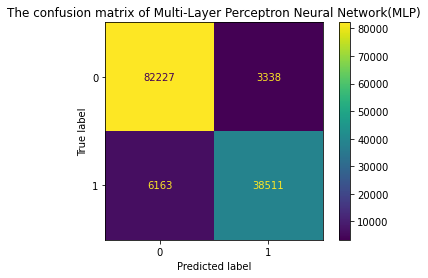

MLPModel saved! Done!


In [86]:
pred_mlp = np.round(model.predict(X_test)).astype('int')
Recall_mlp = recall_score(y_test, pred_mlp, pos_label=1)
f_score_mlp = f1_score(y_test, pred_mlp)
FScoreLstTopTop1.append(f_score_mlp)
df = {'Models': 'Multi-Layer Perceptron Neural Network(MLP)','The Recall score (Class 1)': Recall_mlp}
RecallScoreLstTop1 = RecallScoreLstTop
RecallScoreLstTop1.append(Recall_mlp)
print('---------------------------------------------------------------')
print(f'The Recall score (Class 1) of  Multi-Layer Perceptron Neural Network(MLP): {Recall_mlp*100}')
print('---------------------------------------------------------------')
print(f'Classification_report of  Multi-Layer Perceptron Neural Network(MLP)')
print(classification_report(y_test, pred_mlp))
cm = confusion_matrix(y_test, pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title(f"The confusion matrix of Multi-Layer Perceptron Neural Network(MLP)")
plt.show()
# save model
model.save('./MLPModelclf.h5')
print(f"MLPModel saved! Done!")

In [134]:
AccModelsRecall_all1 = pd.DataFrame({'Models' : ['Random Forest Classifier','Decision Tree Classifier', 'KNeighbors Classifier','AdaBoost Classifier', 
                                'Top 4 models (VotingClassifier)', 'Multi-Layer Perceptron Neural Network(MLP)']})
AccModelsRecall_all1['The Recall score (Class 1)'] = RecallScoreLstTop1
AccModelsRecall_all1['The F_score (Class 1)'] = FScoreLstTopTop1
AccModelsRecall_all1["The best parameters"] = [params_RF, params_DT, params_KNN, params_Adb, 'All Top', {}]
AccModelsRecall_all1

,Models,The Recall score (Class 1),The F_score (Class 1),The best parameters
0,Random Forest Classifier,0.868537,0.884273,"{'bootstrap': False, 'max_features': 'auto', '..."
1,Decision Tree Classifier,0.850562,0.862161,"{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
2,KNeighbors Classifier,0.864239,0.856740,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei..."
3,AdaBoost Classifier,0.761338,0.771798,"{'algorithm': 'SAMME', 'learning_rate': 0.98, ..."
4,Top 4 models (VotingClassifier),0.869409,0.882216,All Top
5,Multi-Layer Perceptron Neural Network(MLP),0.862045,0.890000,{}


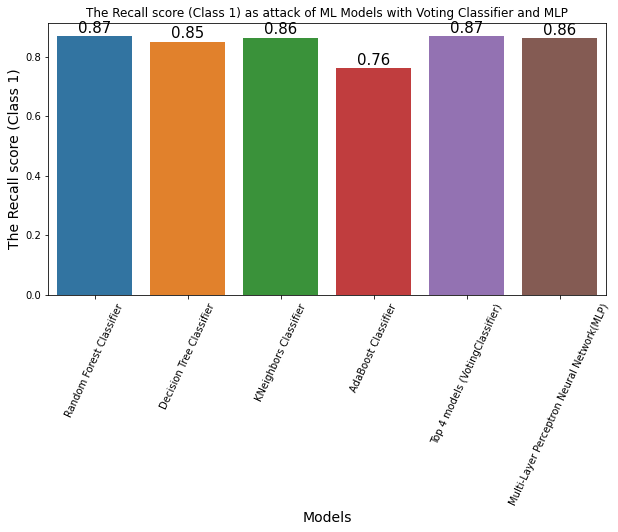

In [136]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x="Models", y='The Recall score (Class 1)', data=AccModelsRecall_all1)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=65);
plt.ylabel("The Recall score (Class 1)", size=14)
plt.title("The Recall score (Class 1) as attack of ML Models with Voting Classifier and MLP")
plt.show()

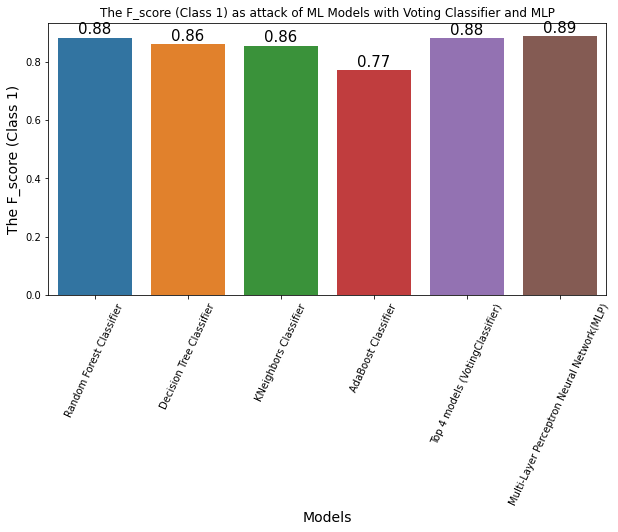

In [137]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x="Models", y='The F_score (Class 1)', data=AccModelsRecall_all1)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=65);
plt.ylabel("The F_score (Class 1)", size=14)
plt.title("The F_score (Class 1) as attack of ML Models with Voting Classifier and MLP")
plt.show()

### The Chaimpion Model

In [143]:
Top_Model= AccModelsRecall_all1.nlargest(1,['The Recall score (Class 1)', 'The F_score (Class 1)'])
Top_Model

,Models,The Recall score (Class 1),The F_score (Class 1),The best parameters
4,Top 4 models (VotingClassifier),0.869409,0.882216,All Top
